# ASSIGNMENT - 3

#### IMPORTS :-

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

#### STOCKS :-

In [15]:
stock_initials = ['TSLA', 'GOOGL', 'JNJ', 'PG', 'JPM', 'AMZN', 'AAPL', 'WMT', 'NFLX', 'MSFT']

#### LOOPS OVER STOCKS

[*********************100%***********************]  1 of 1 completed


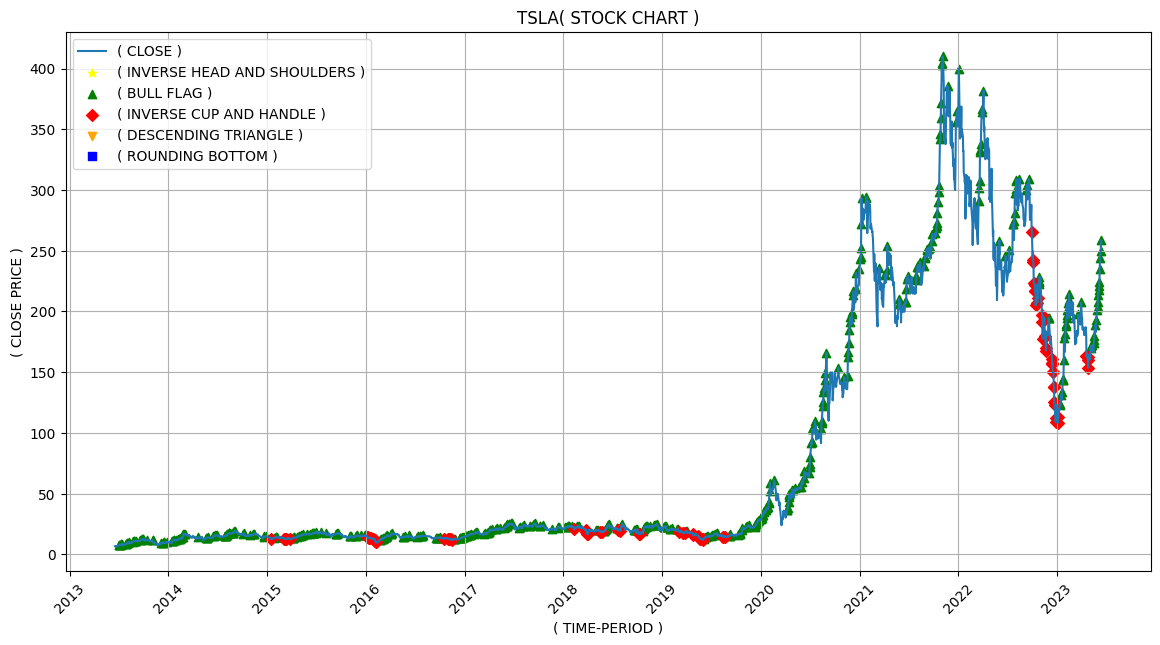

[*********************100%***********************]  1 of 1 completed


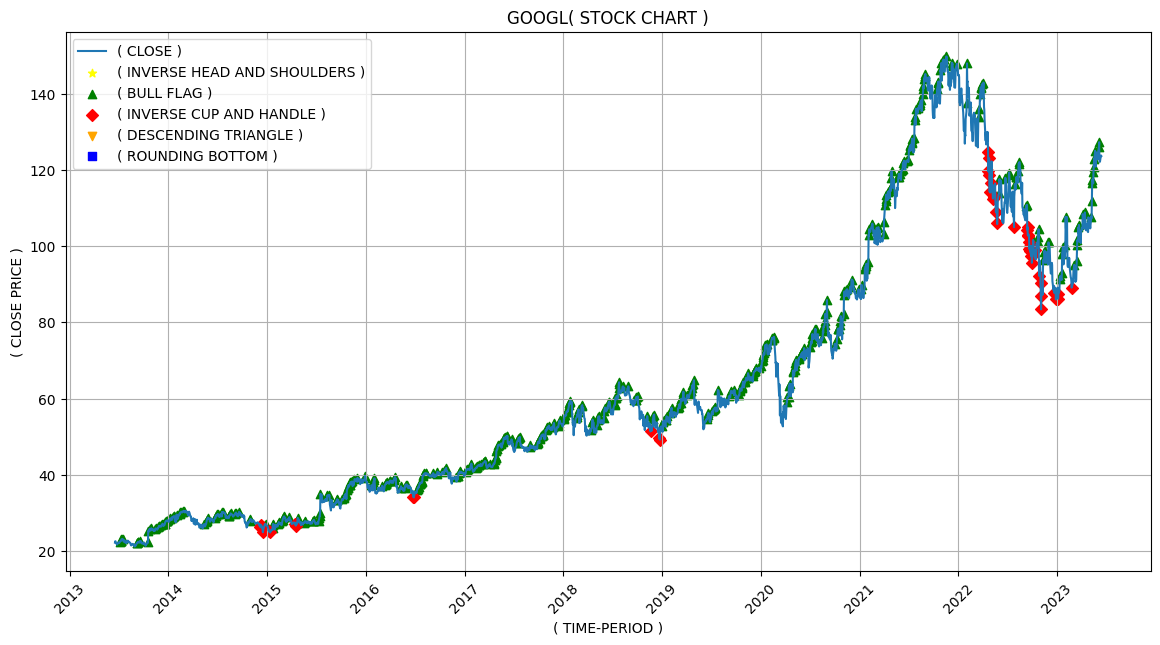

[*********************100%***********************]  1 of 1 completed


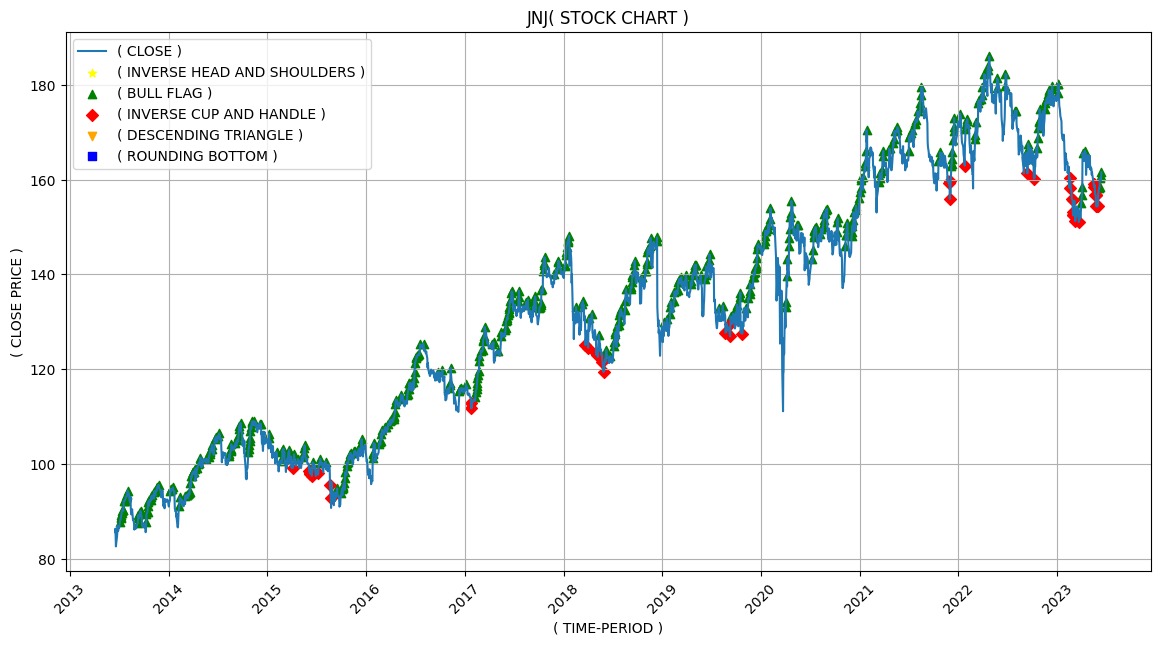

[*********************100%***********************]  1 of 1 completed


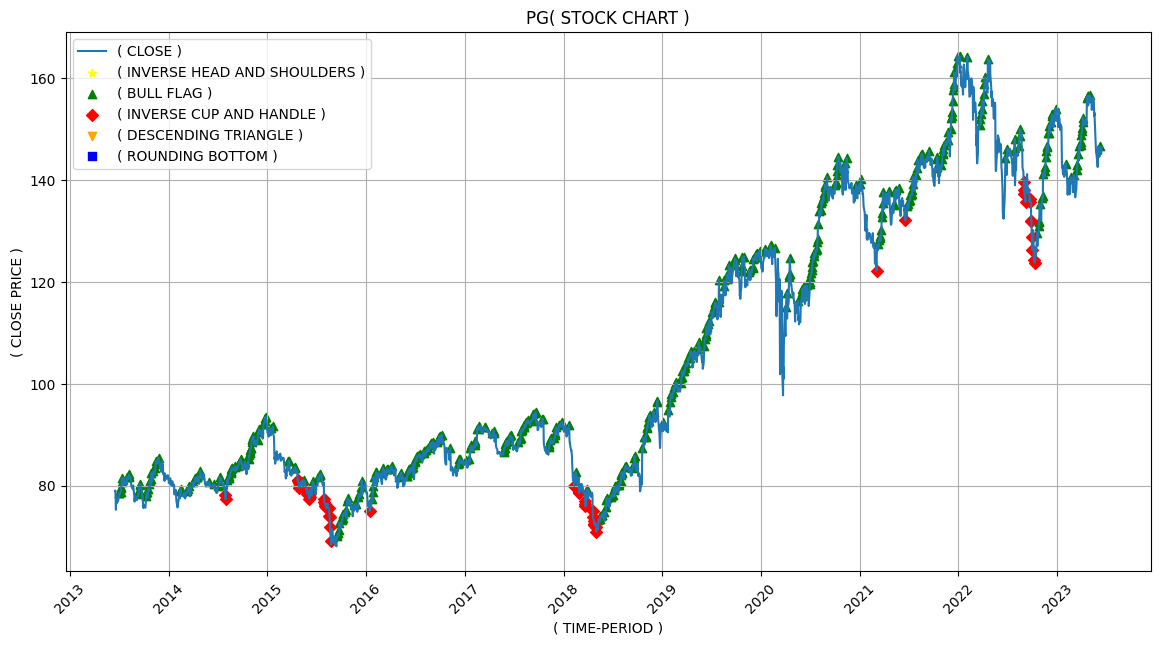

[*********************100%***********************]  1 of 1 completed


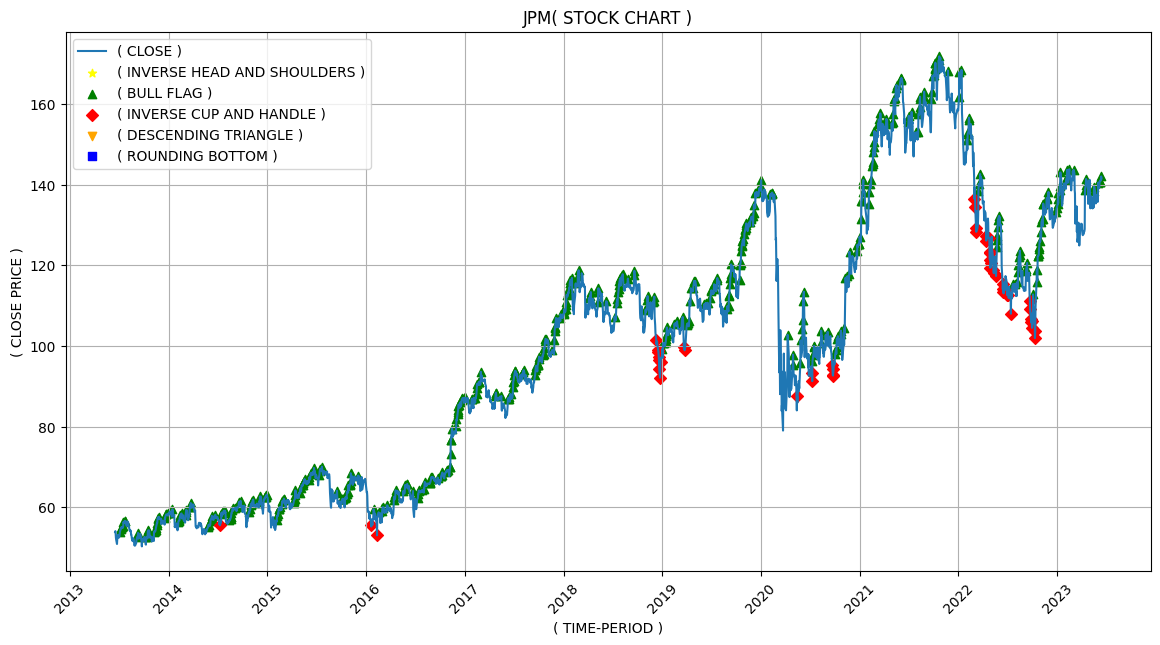

[*********************100%***********************]  1 of 1 completed


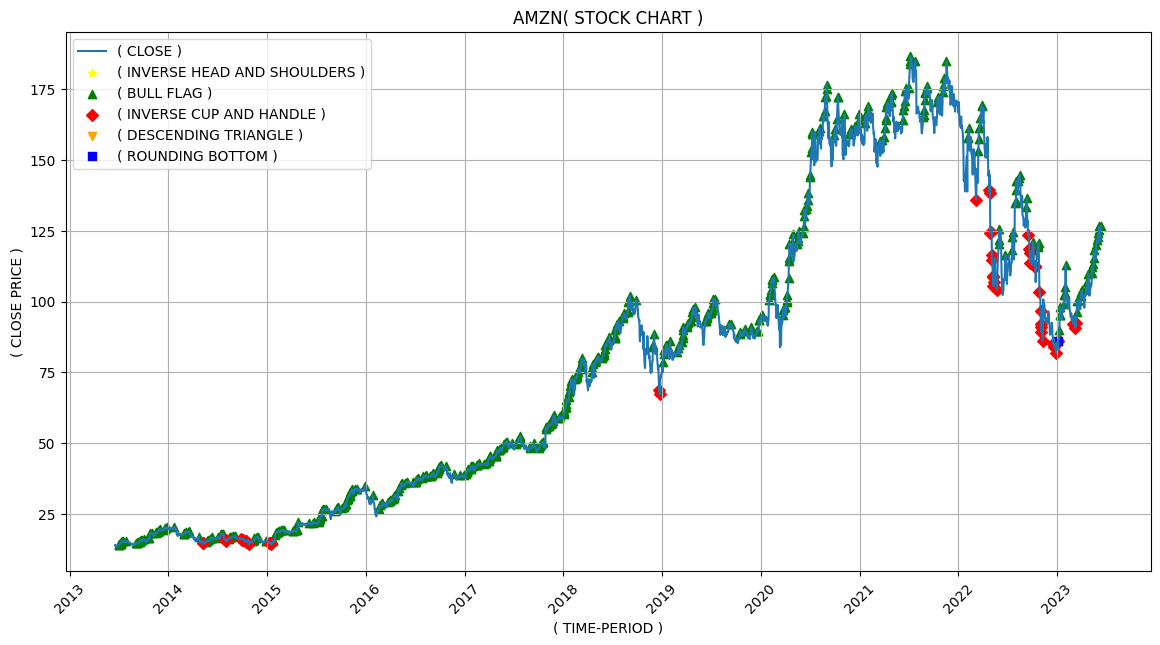

[*********************100%***********************]  1 of 1 completed


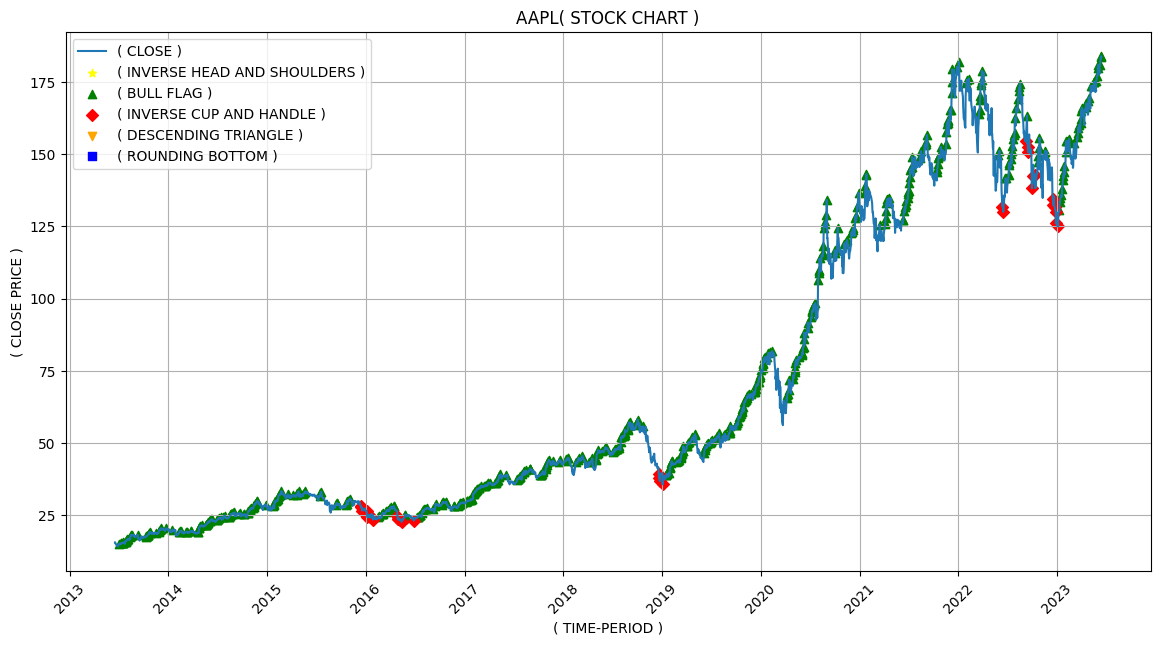

[*********************100%***********************]  1 of 1 completed


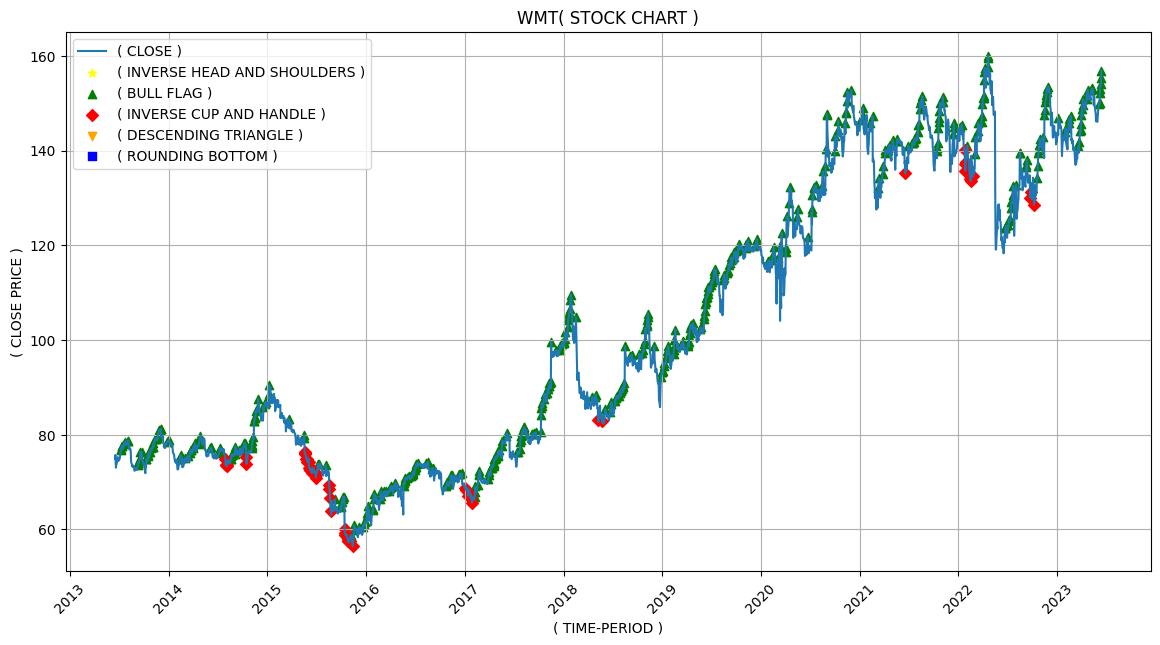

[*********************100%***********************]  1 of 1 completed


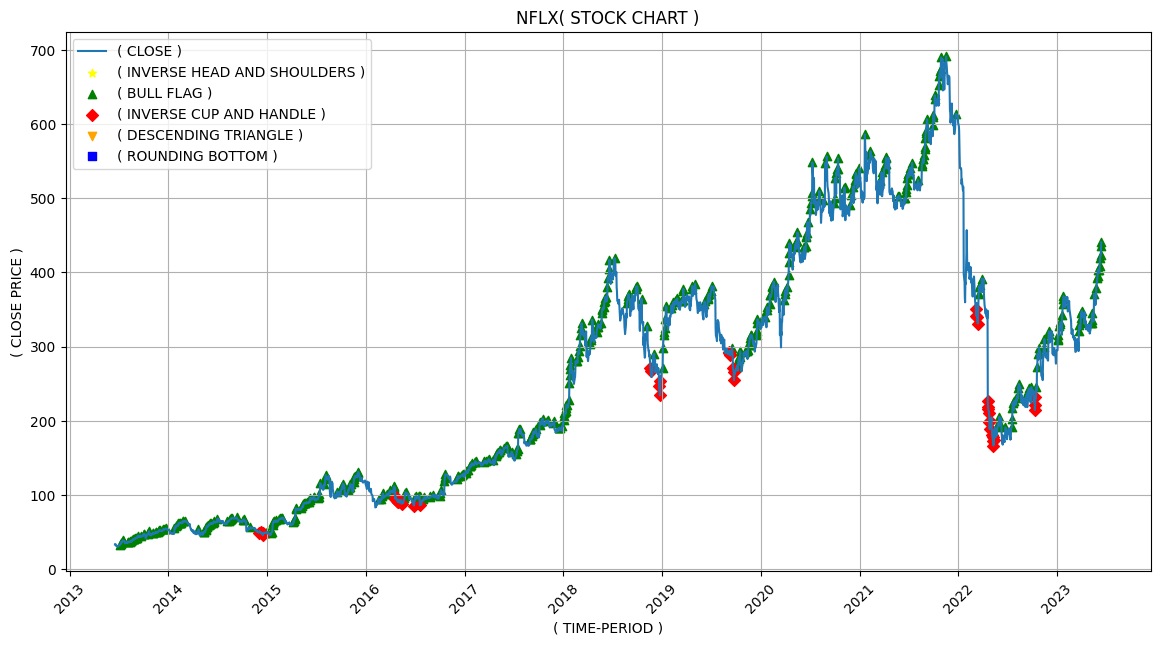

[*********************100%***********************]  1 of 1 completed


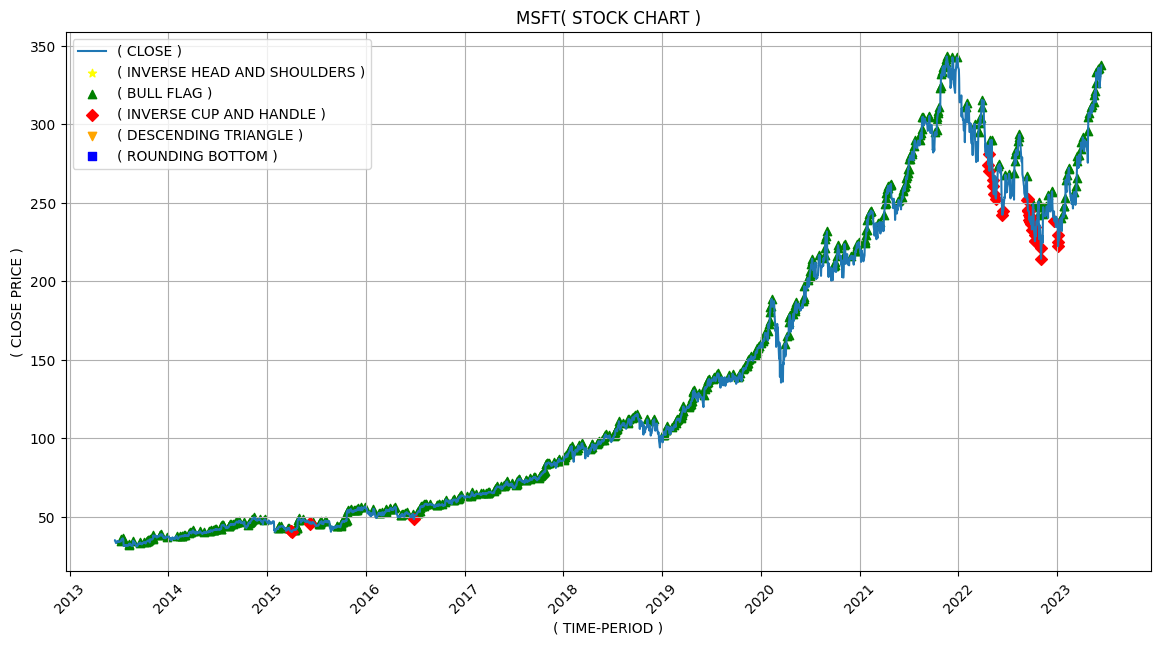

In [27]:
for symbol in stock_initials:
    # DOWNLOADING STOCK DATA 
    stock_data = yf.download(symbol, start='2013-06-15', end='2023-06-15')

    # MOVING AVERAGE CALCULATION
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

    # BULL FLAG
    bull_flag = (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['BullFlag'] = bull_flag.astype(int)

    # INVERSE CUP AND HANDLE
    inverse_cup_handle = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                         (stock_data['SMA_50'] < stock_data['SMA_200'])
    stock_data['InverseCupHandle'] = inverse_cup_handle.astype(int)

    # DESCENDING TRIANGLE
    descending_triangle = (stock_data['High'].rolling(window=30).max() == stock_data['High']) & \
                          (stock_data['Low'].rolling(window=30).min().shift(1) == stock_data['Low'])
    stock_data['DescendingTriangle'] = descending_triangle.astype(int)

    # ROUNDING BOTTOM
    rounding_bottom = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                      (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['RoundingBottom'] = rounding_bottom.astype(int)

    # INVERSE HEAD AND SHOULDERS
    inverse_head_shoulder = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                            (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['InverseHeadShoulder'] = inverse_head_shoulder.astype(int)


    # STOCK CHART
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Close'], label='( CLOSE )')

    # PATTERN MARKERS
    plt.scatter(stock_data[stock_data['InverseHeadShoulder'] == 1].index, stock_data[stock_data['InverseHeadShoulder'] == 1]['Close'], marker='*', color='yellow', label='( INVERSE HEAD AND SHOULDERS )')
    plt.scatter(stock_data[stock_data['BullFlag'] == 1].index, stock_data[stock_data['BullFlag'] == 1]['Close'], marker='^', color='green', label='( BULL FLAG )')
    plt.scatter(stock_data[stock_data['InverseCupHandle'] == 1].index, stock_data[stock_data['InverseCupHandle'] == 1]['Close'], marker='D', color='red', label='( INVERSE CUP AND HANDLE )')
    plt.scatter(stock_data[stock_data['DescendingTriangle'] == 1].index, stock_data[stock_data['DescendingTriangle'] == 1]['Close'], marker='v', color='orange', label='( DESCENDING TRIANGLE )')
    plt.scatter(stock_data[stock_data['RoundingBottom'] == 1].index, stock_data[stock_data['RoundingBottom'] == 1]['Close'], marker='s', color='blue', label='( ROUNDING BOTTOM )')
    plt.title(symbol + '( STOCK CHART )')
    plt.xlabel('( TIME-PERIOD )')
    plt.ylabel('( CLOSE PRICE )')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
